In [180]:
#import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [181]:
#read the data
df=pd.read_csv("data/data.csv")

In [182]:
#print the first 6 rows 
df.head(4)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No


In [183]:
#feature of the data set:  data type, null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [184]:
#check if there is duplication
df.duplicated().sum()

0

In [185]:
#Data shape: it has 303 rows and 15 columns
df.shape

(303, 15)

In [186]:
#check for NAN values
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [187]:
#Replace the Ca by zero and Thal to normal
df.fillna({'Ca':0, 'Thal':'normal'}, inplace=True)


In [188]:
#check Male and females
df['Sex'][df['Sex']==0].value_counts='Female'
df['Sex'][df['Sex']==1].value_counts='Male'


In [189]:
df["Sex"].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      0
      ..
298    1
299    1
300    1
301    0
302    1
Name: Sex, Length: 303, dtype: int64>

Text(0, 0.5, 'Total number of People')

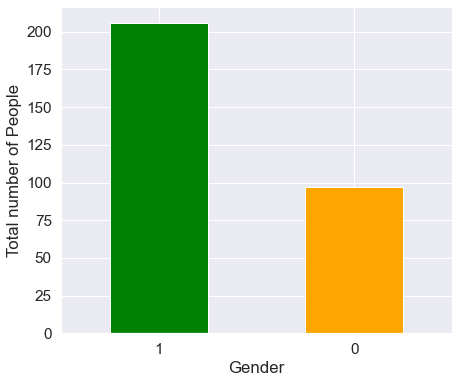

In [190]:

df['Sex'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0,color=["green","Orange"])
plt.xlabel("Gender")
plt.ylabel("Total number of People")


In [191]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Sex'.
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Ca']= label_encoder.fit_transform(df['Ca'])


In [170]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

In [207]:
df_new=df[['Age','Sex','ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG',
       'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD']]

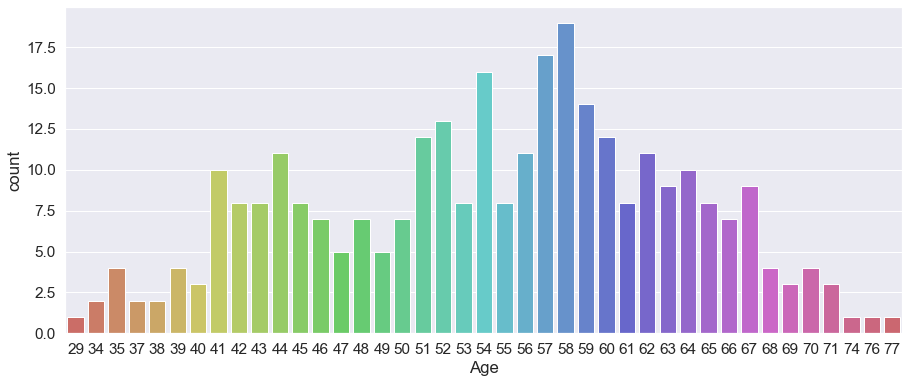

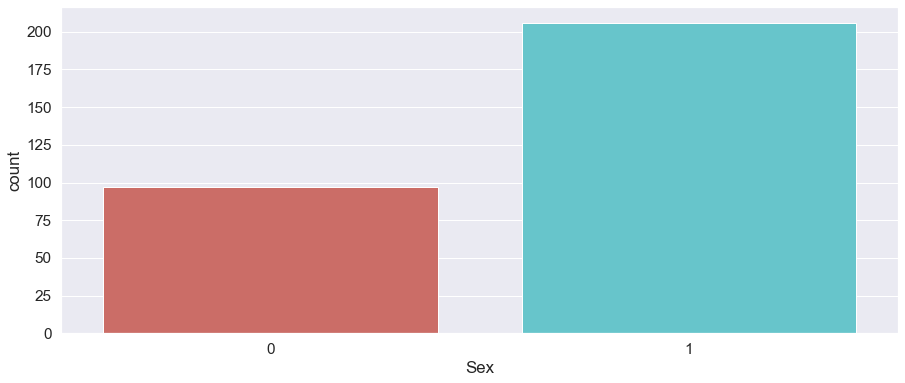

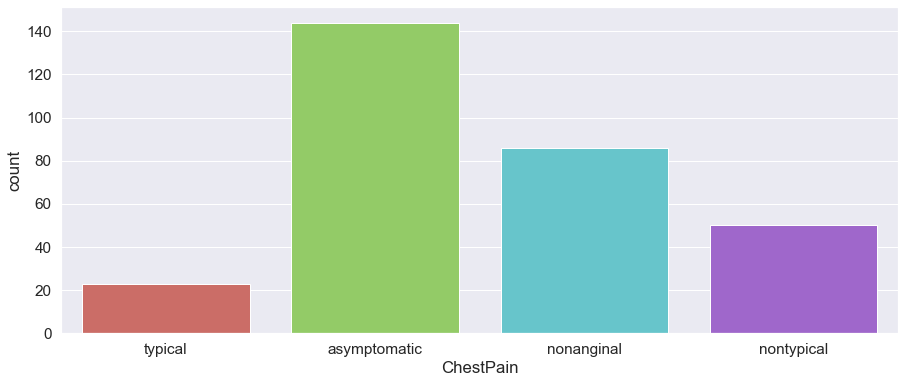

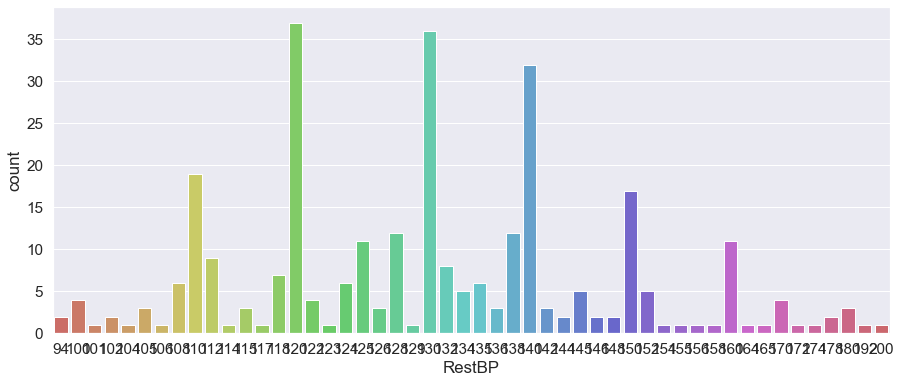

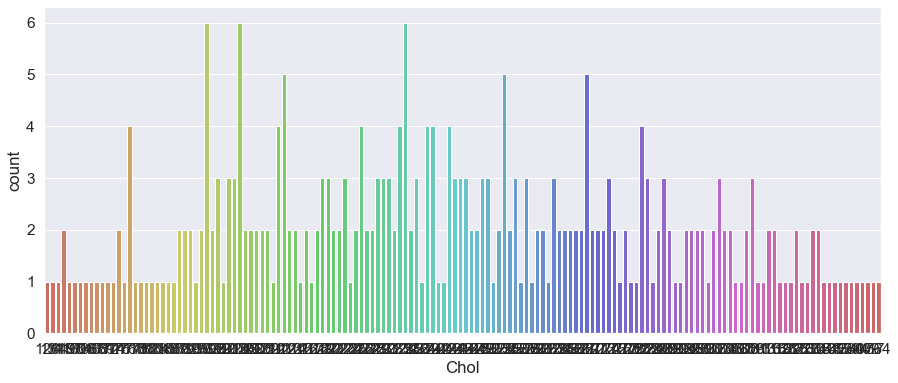

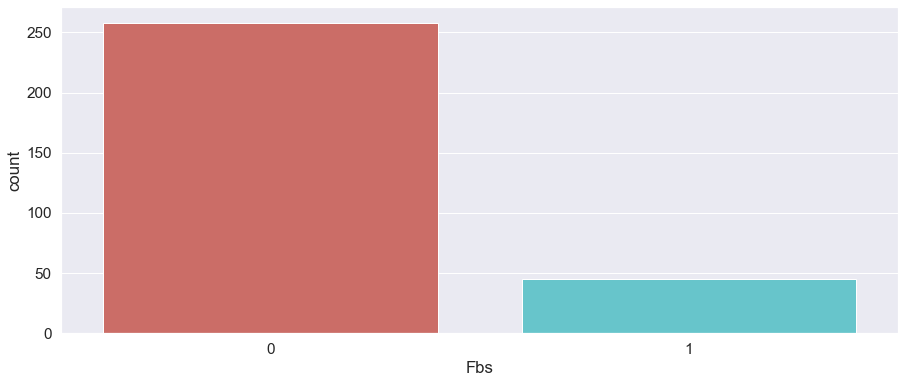

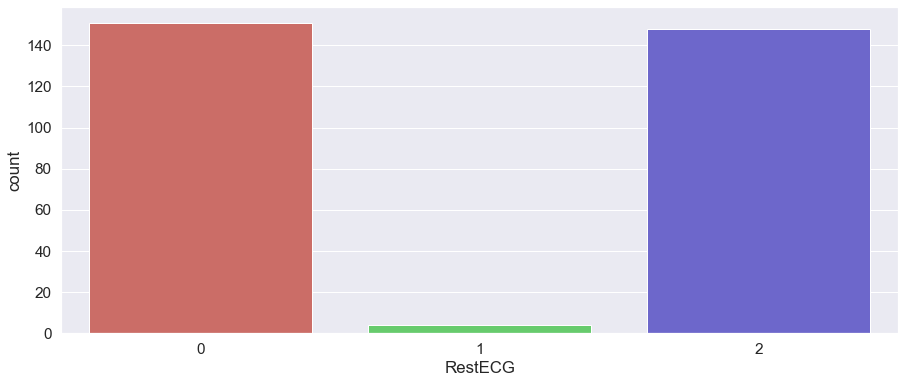

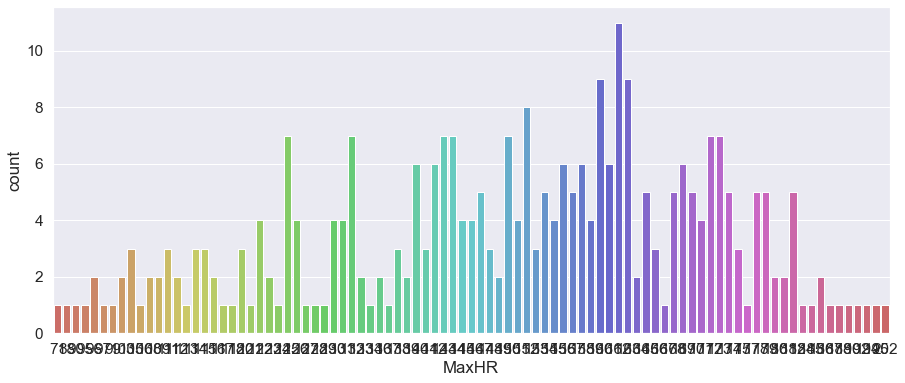

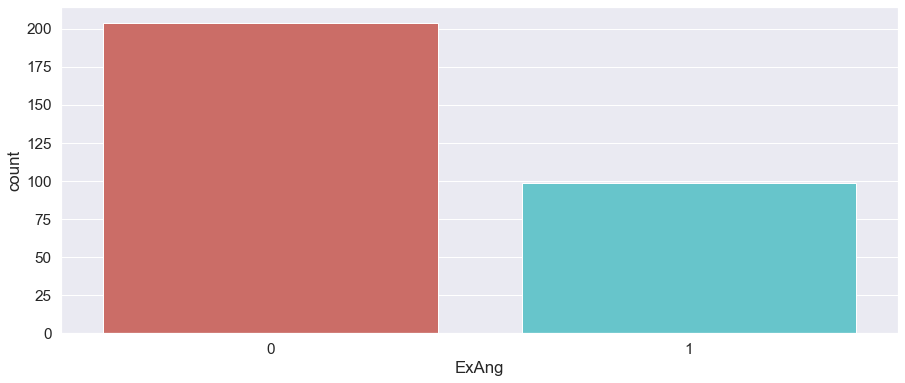

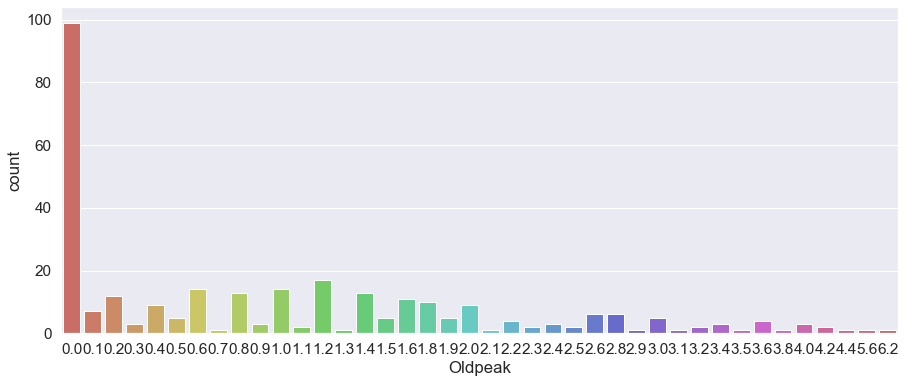

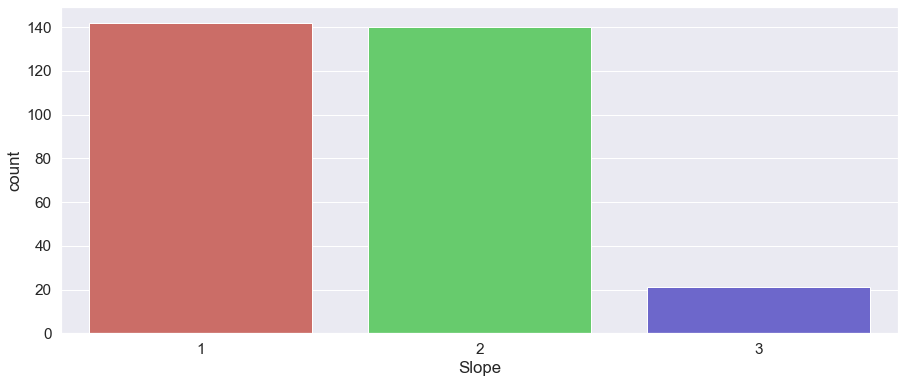

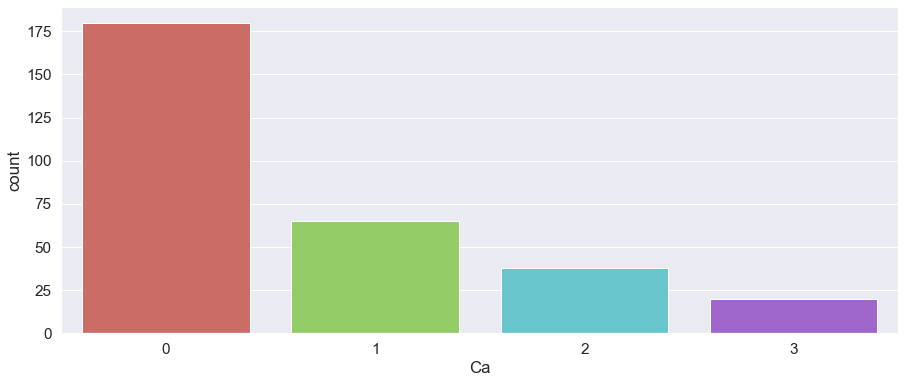

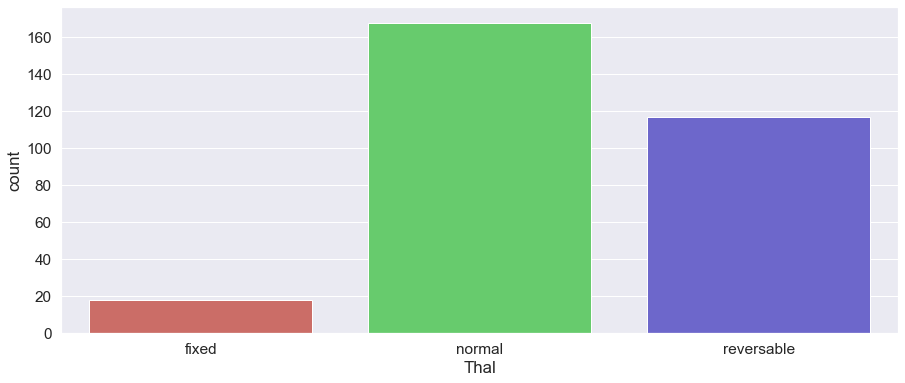

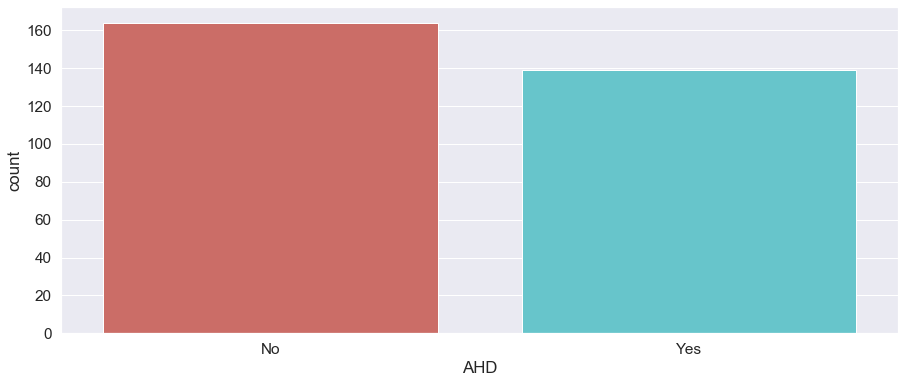

In [208]:
for i in df_new.columns:
    plt.figure(figsize=(15,6))
    sn.countplot(df_new[i],data=df_new,palette="hls")
    plt.show()

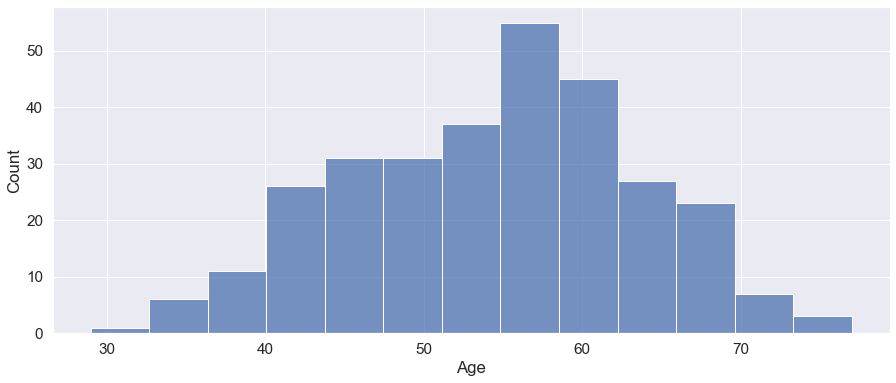

In [209]:
plt.figure(figsize=(15,6))
sn.histplot(df['Age'])
plt.show()

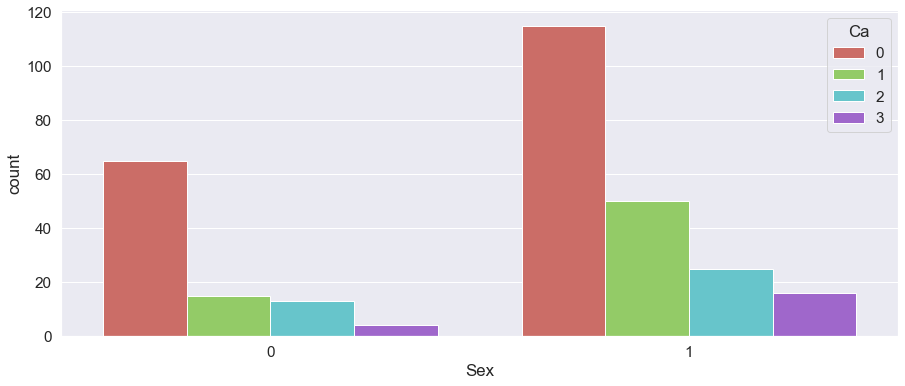

In [210]:
plt.figure(figsize=(15,6))
sn.countplot('Sex',data=df_new,hue="Ca",palette='hls')
plt.show()

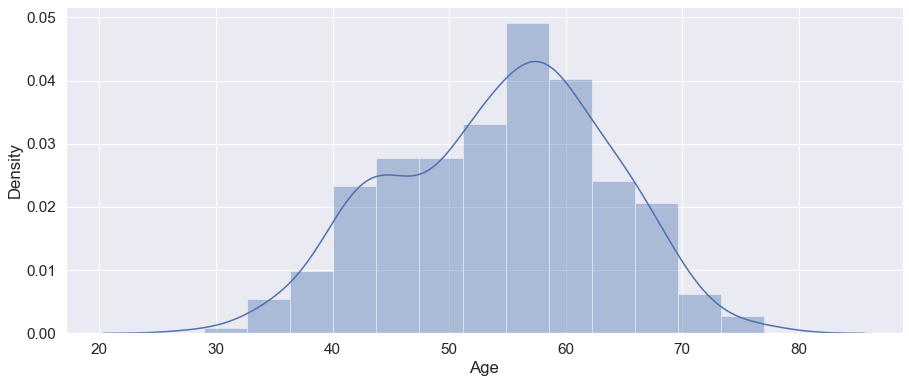

In [211]:
plt.figure(figsize=(15,6))
sn.distplot(df_new["Age"])
plt.show()

In [212]:
Corr_matrix=df_new.corr()
Corr_matrix

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
Age,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323
Sex,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048
RestBP,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528
Chol,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726
Fbs,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764
RestECG,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749
MaxHR,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699
ExAng,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788
Oldpeak,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067
Slope,0.161770,0.037533,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.110803


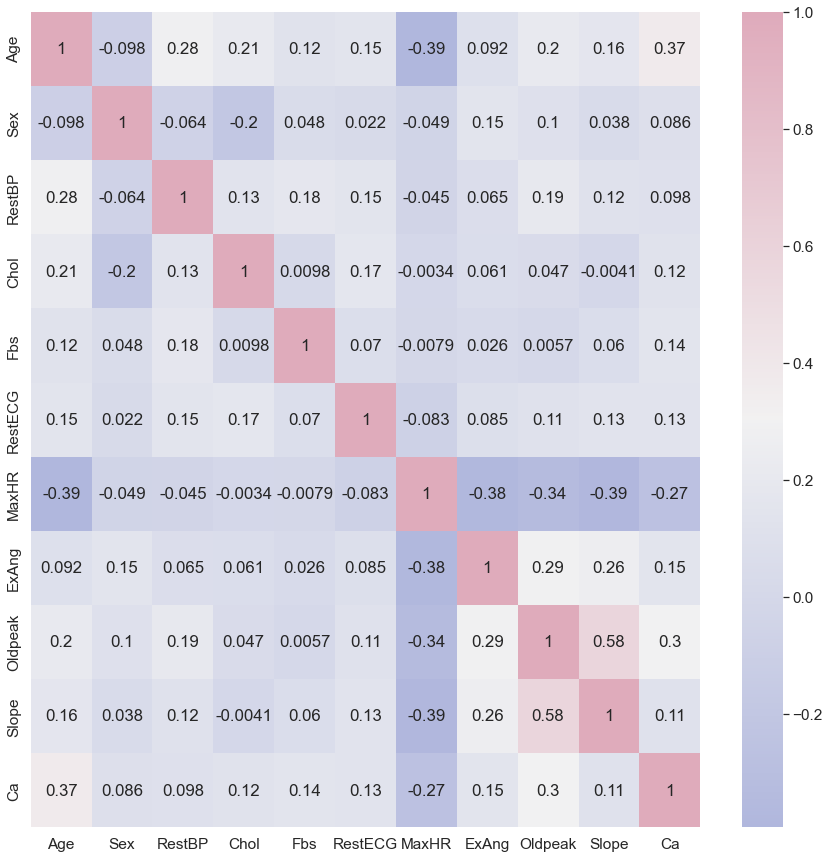

In [224]:
cmap=sn.diverging_palette(260,-10,s=50,l=75, n=6,as_cmap=True)
plt.figure(figsize=(15, 15))
sn.heatmap(Corr_matrix,cmap=cmap, annot=True)
plt.show()
